In [358]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

# data_one

In [260]:
df = pd.read_csv('data_1.csv')
print(df.shape)
df.head(3)

(19, 1)


MILK,BREAD,BISCUIT
0  BREAD,MILK,BISCUIT,CORNFLAKES
1            BREAD,TEA,BOURNVITA
2           JAM,MAGGI,BREAD,MILK

In [261]:
df = pd.read_csv('data_1.csv',names = ['items'], sep = ',')
print(df.shape)
df.head(3)

(20, 1)


items
0             MILK,BREAD,BISCUIT
1  BREAD,MILK,BISCUIT,CORNFLAKES
2            BREAD,TEA,BOURNVITA

In [262]:
transactions = df['items'].apply(lambda x : x.split(','))
print(transactions.shape)
transactions.head(3)

(20,)


0                [MILK, BREAD, BISCUIT]
1    [BREAD, MILK, BISCUIT, CORNFLAKES]
2               [BREAD, TEA, BOURNVITA]
Name: items, dtype: object

In [263]:
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
te_df = pd.DataFrame(te_ary, columns = te.columns_)
print(te_df.shape)
te_df.head(3)

(20, 11)


BISCUIT  BOURNVITA  BREAD   COCK  COFFEE  CORNFLAKES    JAM  MAGGI   MILK  \
0     True      False   True  False   False       False  False  False   True   
1     True      False   True  False   False        True  False  False   True   
2    False       True   True  False   False       False  False  False  False   

   SUGER    TEA  
0  False  False  
1  False  False  
2  False   True

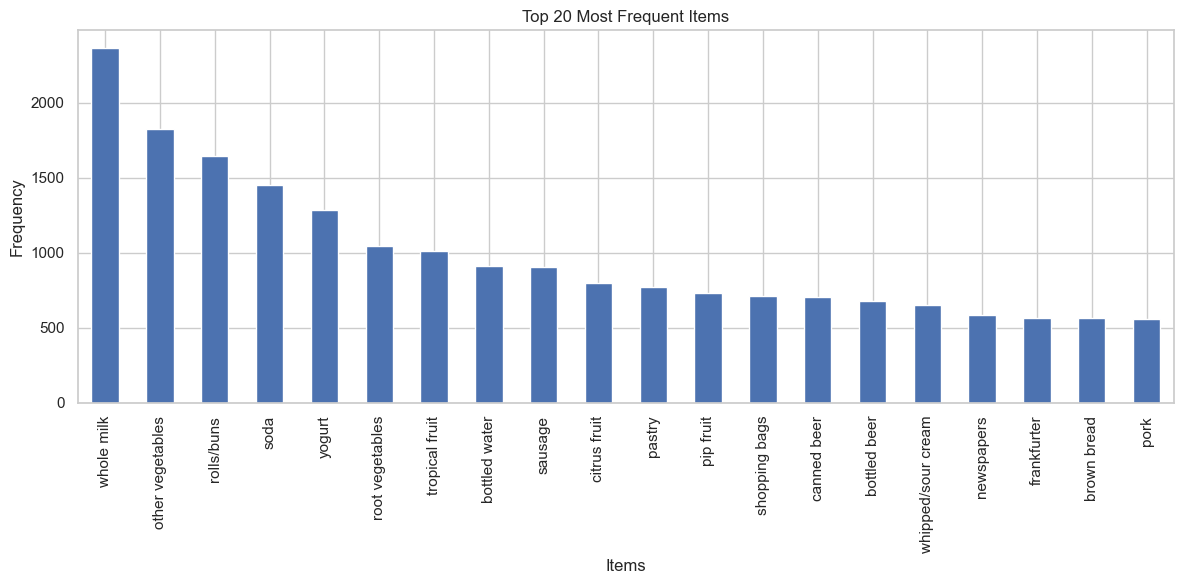

In [369]:
def plot_item_frequency(df):
    item_frequency = df.sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    item_frequency[:20].plot(kind='bar')
    plt.title('Top 20 Most Frequent Items')
    plt.xlabel('Items')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_item_frequency(te_df)

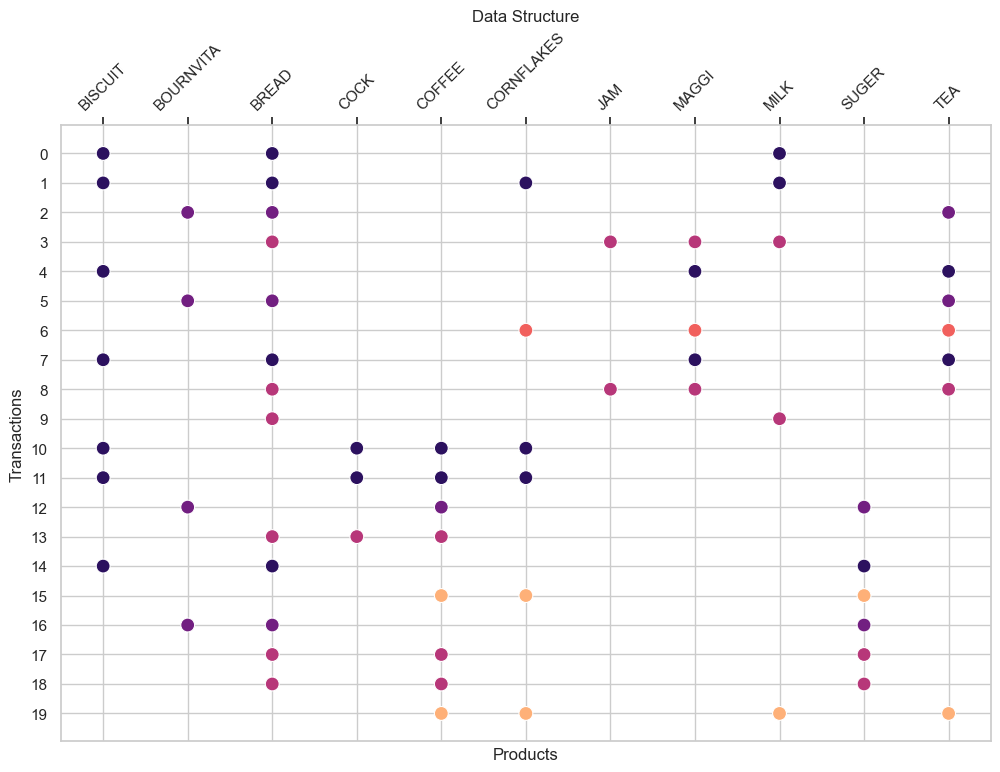

In [277]:
# Prepare the dataframe for plotting
plot_df = te_df.copy()
plot_df["Cat"] = plot_df.apply(lambda row: row.idxmax(), axis=1)

for i in range(len(plot_df.columns) - 1):  # Exclude the 'Cat' column
    plot_df[plot_df.columns[i]] = np.where(plot_df[plot_df.columns[i]] == 1, i + 1, 0)

plt.figure(figsize=(12, 8))

# Get the unique categories actually present in the data
unique_cats = plot_df["Cat"].unique()
# Create a color palette with exactly the right number of colors
palette = sns.color_palette("magma", len(unique_cats))
# Create a dictionary mapping categories to colors
color_dict = dict(zip(unique_cats, palette))

for col in plot_df.columns[:-1]:  # Exclude the 'Cat' column
    scatter_data = plot_df[plot_df[col] > 0]
    sns.scatterplot(
        x=scatter_data[col],
        y=scatter_data.index,
        hue=scatter_data['Cat'],
        palette=color_dict,  # Use the color dictionary instead of the full palette
        legend=False,
        s=100  # Adjust size of the points here
    )

# Reverse y-axis and move x-axis to the top
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

plt.xticks(np.arange(1, len(te_df.columns) + 1), te_df.columns, rotation=45)
plt.yticks(te_df.index)
plt.xlabel('Products')
plt.ylabel('Transactions')
plt.title('Data Structure')
plt.show()

In [179]:
freq_items = apriori(te_df, min_support = 0.15, use_colnames = True, verbose = 1)
print(freq_items.shape)
freq_items.head(3)

Processing 117 combinations | Sampling itemset size 3
(22, 2)


support     itemsets
0     0.35    (BISCUIT)
1     0.20  (BOURNVITA)
2     0.65      (BREAD)

In [180]:
# freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
# print(freq_items.shape)
# freq_items.head(3)

In [181]:
rules =  association_rules(freq_items,metric = 'lift',min_threshold = 0.8)
print(rules.shape)
rules.head(3)

(22, 10)


antecedents   consequents  antecedent support  consequent support  support  \
0   (BISCUIT)       (BREAD)                0.35                0.65     0.20   
1     (BREAD)     (BISCUIT)                0.65                0.35     0.20   
2   (BISCUIT)  (CORNFLAKES)                0.35                0.30     0.15   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.571429  0.879121   -0.0275    0.816667      -0.174603  
1    0.307692  0.879121   -0.0275    0.938889      -0.282051  
2    0.428571  1.428571    0.0450    1.225000       0.461538

In [182]:
# rules['antecedent'] = rules['antecedents'].apply(lambda antecedents : list(antecedents)[0])
# rules['consequent'] = rules['consequents'].apply(lambda consequents : list(consequents)[0])
# rules['rule'] = rules.index
# rules

# cords = rules[['antecedent','consequent','rule']]
# parallel_coordinates(cords,'rule',colormap = 'ocean')

In [183]:
# rules.sort_values('lift',ascending = False).head(5)

# rules.sort_values('confidence',ascending = False).head(5)

# rules.sort_values('support',ascending = False).head(5)

# rules[(rules['confidence']>0.79) & (rules['lift'] > 1.65)]

# print(len(rules[(rules['confidence']>0.79) & (rules['lift'] > 1.65)]))

# rules[(rules['leverage']< 0 ) & (rules['lift'] < 0.9)]

# rules[(rules['support'] > 0.15) & (rules['confidence'] > 0.5)].sort_values("confidence", ascending = False)

# data_two

In [279]:
df = pd.read_csv('data_2.0.csv')
print(df.shape)
df.head(3)

(7500, 20)


shrimp    almonds avocado vegetables mix green grapes whole weat flour  \
0  burgers  meatballs    eggs            NaN          NaN              NaN   
1  chutney        NaN     NaN            NaN          NaN              NaN   
2   turkey    avocado     NaN            NaN          NaN              NaN   

  yams cottage cheese energy drink tomato juice low fat yogurt green tea  \
0  NaN            NaN          NaN          NaN            NaN       NaN   
1  NaN            NaN          NaN          NaN            NaN       NaN   
2  NaN            NaN          NaN          NaN            NaN       NaN   

  honey salad mineral water salmon antioxydant juice frozen smoothie spinach  \
0   NaN   NaN           NaN    NaN               NaN             NaN     NaN   
1   NaN   NaN           NaN    NaN               NaN             NaN     NaN   
2   NaN   NaN           NaN    NaN               NaN             NaN     NaN   

   olive oil  
0        NaN  
1        NaN  
2        NaN

In [280]:
df = pd.read_csv('data_2.0.csv',header=None)
print(df.shape)
df.head(3)

(7501, 20)


0          1        2               3             4   \
0   shrimp    almonds  avocado  vegetables mix  green grapes   
1  burgers  meatballs     eggs             NaN           NaN   
2  chutney        NaN      NaN             NaN           NaN   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  salad  mineral water  salmon   
1             NaN        NaN    NaN    NaN            NaN     NaN   
2             NaN        NaN    NaN    NaN            NaN     NaN   

                  16               17       18         19  
0  antioxydant juice  frozen smoothie  spinach  olive oil  
1                NaN              NaN      NaN        NaN  
2                NaN              NaN      NaN        NaN

In [283]:
df = pd.read_csv('data_2.1.csv')
print(df.shape)
df.head(3)

(9835, 32)


Product 1            Product 2  Product 3    Product 4 Product 5  \
0    citrus fruit  semi-finished bread  margarine  ready soups       NaN   
1  tropical fruit               yogurt     coffee          NaN       NaN   
2      whole milk                  NaN        NaN          NaN       NaN   

  Product 6 Product 7 Product 8 Product 9 Product 10  ... Product 23  \
0       NaN       NaN       NaN       NaN        NaN  ...        NaN   
1       NaN       NaN       NaN       NaN        NaN  ...        NaN   
2       NaN       NaN       NaN       NaN        NaN  ...        NaN   

  Product 24 Product 25 Product 26 Product 27 Product 28 Product 29  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   

  Product 30 Product 31 Product 32  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  

[3 rows x 32 columns]

In [284]:
df = pd.read_csv('data_2.1.csv',header=None)
df = df.drop(0)
print(df.shape)
df.head(3)

(9835, 32)


0                    1          2            3    4    5    6   \
1    citrus fruit  semi-finished bread  margarine  ready soups  NaN  NaN  NaN   
2  tropical fruit               yogurt     coffee          NaN  NaN  NaN  NaN   
3      whole milk                  NaN        NaN          NaN  NaN  NaN  NaN   

    7    8    9   ...   22   23   24   25   26   27   28   29   30   31  
1  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 32 columns]

In [285]:
df.fillna(0,inplace=True)
print(df.shape)
df.head(3)

(9835, 32)


0                    1          2            3  4  5  6  7  8   \
1    citrus fruit  semi-finished bread  margarine  ready soups  0  0  0  0  0   
2  tropical fruit               yogurt     coffee            0  0  0  0  0  0   
3      whole milk                    0          0            0  0  0  0  0  0   

  9   ... 22 23 24 25 26 27 28 29 30 31  
1  0  ...  0  0  0  0  0  0  0  0  0  0  
2  0  ...  0  0  0  0  0  0  0  0  0  0  
3  0  ...  0  0  0  0  0  0  0  0  0  0  

[3 rows x 32 columns]

In [286]:
transactions = []

for i in range(df.shape[0]):
    # Convert the row to a list, dropping NaN values
    transaction = df.iloc[i].dropna().tolist()
    # Filter out zero values from the list
    filtered_transaction = [item for item in transaction if item != 0]
    # Append the filtered list to transactions
    transactions.append(filtered_transaction)

print(len(transactions))
transactions

9835


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [287]:
# to check
print(transactions[0])
print(transactions[1])
print(transactions[2])

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
['tropical fruit', 'yogurt', 'coffee']
['whole milk']


In [288]:
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
te_df = pd.DataFrame(te_ary, columns = te.columns_)
print(te_df.shape)
te_df.head(3)

(9835, 169)


Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False   False     False  
1       False       False    True     False  
2       False        True   False     False  

[3 rows x 169 columns]

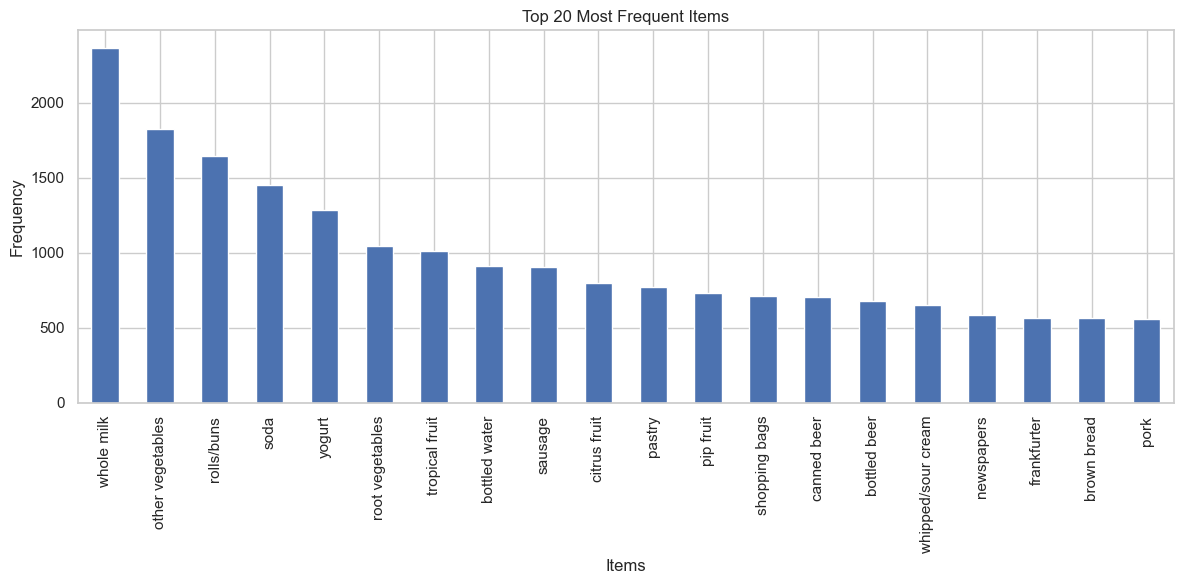

In [370]:
def plot_item_frequency(df):
    item_frequency = df.sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    item_frequency[:20].plot(kind='bar')
    plt.title('Top 20 Most Frequent Items')
    plt.xlabel('Items')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_item_frequency(te_df)

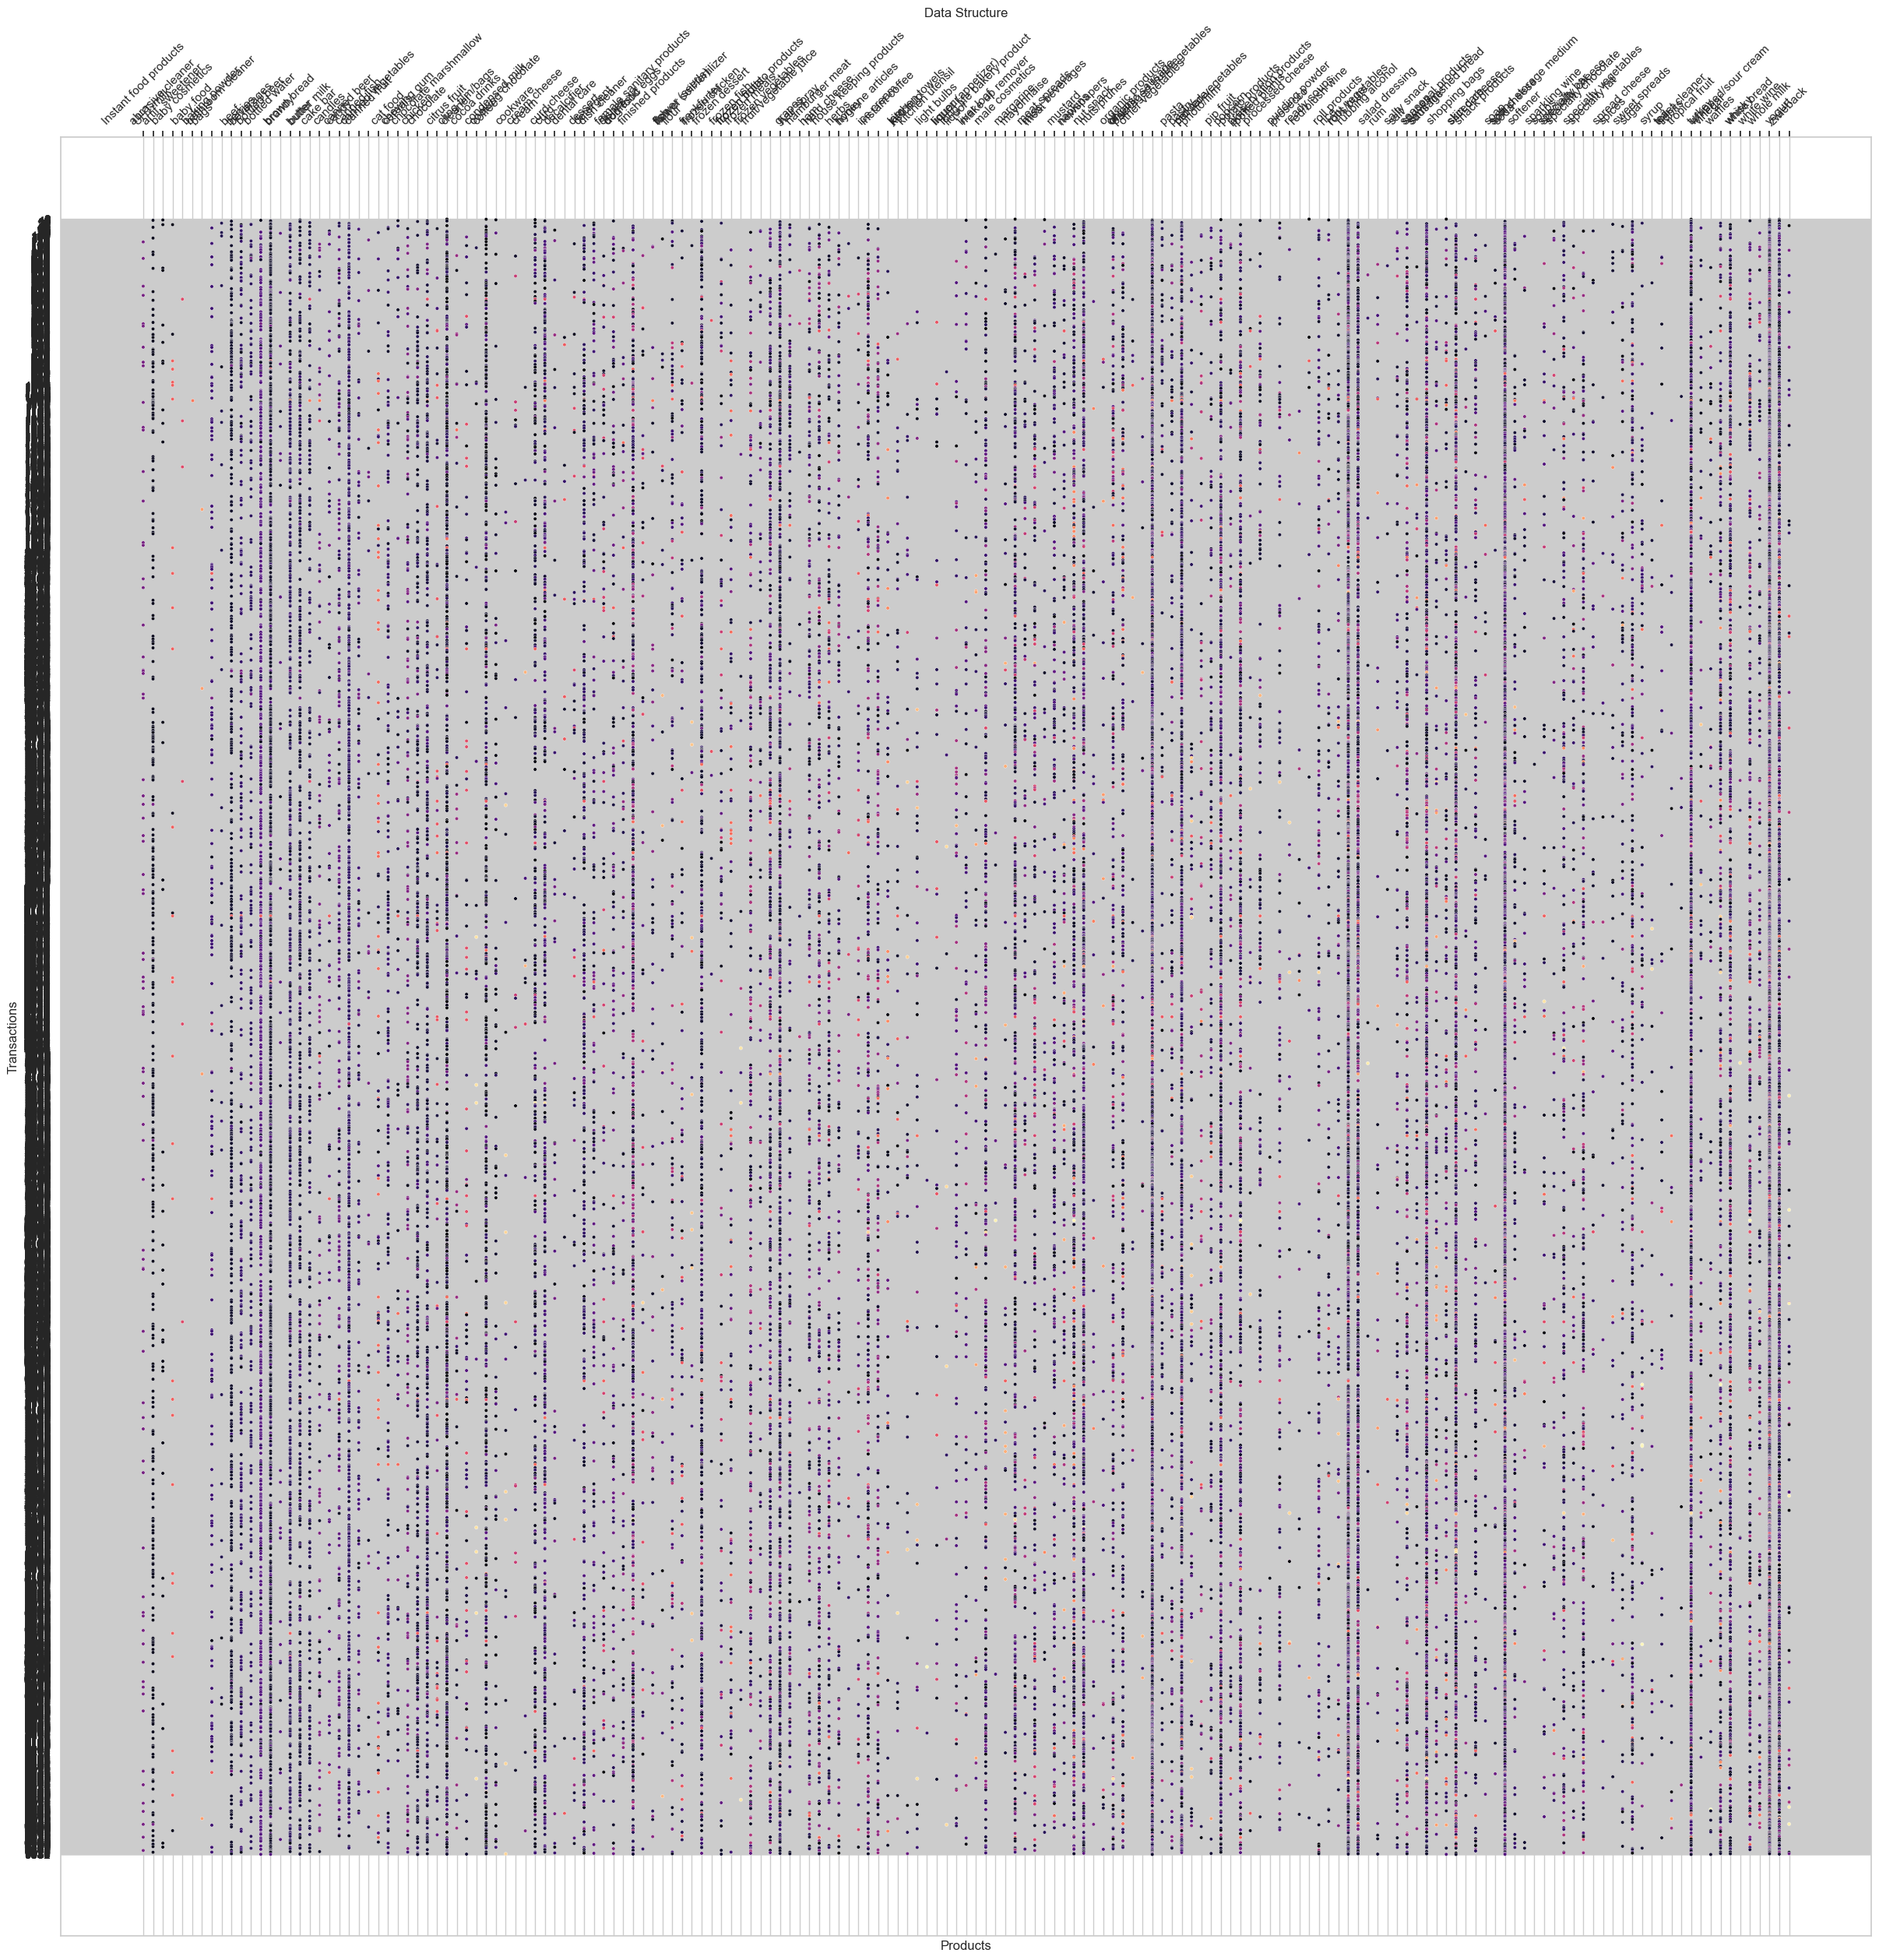

In [289]:
# # Prepare the dataframe for plotting
# plot_df = te_df.copy()
# plot_df["Cat"] = plot_df.apply(lambda row: row.idxmax(), axis=1)

# for i in range(len(plot_df.columns) - 1):  # Exclude the 'Cat' column
#     plot_df[plot_df.columns[i]] = np.where(plot_df[plot_df.columns[i]] == 1, i + 1, 0)

# plt.figure(figsize=(30, 30))

# # Get the unique categories actually present in the data
# unique_cats = plot_df["Cat"].unique()
# # Create a color palette with exactly the right number of colors
# palette = sns.color_palette("magma", len(unique_cats))
# # Create a dictionary mapping categories to colors
# color_dict = dict(zip(unique_cats, palette))

# for col in plot_df.columns[:-1]:  # Exclude the 'Cat' column
#     scatter_data = plot_df[plot_df[col] > 0]
#     sns.scatterplot(
#         x=scatter_data[col],
#         y=scatter_data.index,
#         hue=scatter_data['Cat'],
#         palette=color_dict,  # Use the color dictionary instead of the full palette
#         legend=False,
#         s=10  # Adjust size of the points here
#     )

# # Reverse y-axis and move x-axis to the top
# plt.gca().invert_yaxis()
# plt.gca().xaxis.tick_top()

# plt.xticks(np.arange(1, len(te_df.columns) + 1), te_df.columns, rotation=45)
# plt.yticks(te_df.index)
# plt.xlabel('Products')
# plt.ylabel('Transactions')
# plt.title('Data Structure')
# plt.show()

In [190]:
freq_items = apriori(te_df, min_support = 0.003, use_colnames = True, verbose = 1)
print(freq_items.shape)
freq_items.head(3)

Processing 435 combinations | Sampling itemset size 5 4
(1443, 2)


support             itemsets
0  0.020397            (almonds)
1  0.008932  (antioxydant juice)
2  0.004666          (asparagus)

In [191]:
# freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
# print(freq_items.shape)
# freq_items.head(3)

In [192]:
rules =  association_rules(freq_items,metric = 'lift',min_threshold = 0.2)
print(rules.shape)
rules.head(3)

(5128, 10)


antecedents consequents  antecedent support  consequent support   support  \
0   (burgers)   (almonds)            0.087188            0.020397  0.005199   
1   (almonds)   (burgers)            0.020397            0.087188  0.005199   
2      (cake)   (almonds)            0.081056            0.020397  0.003066   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.059633  2.923577  0.003421    1.041724       0.720799  
1    0.254902  2.923577  0.003421    1.225089       0.671653  
2    0.037829  1.854607  0.001413    1.018117       0.501448

In [193]:
# rules['antecedent'] = rules['antecedents'].apply(lambda antecedents : list(antecedents)[0])
# rules['consequent'] = rules['consequents'].apply(lambda consequents : list(consequents)[0])
# rules['rule'] = rules.index
# rules

# cords = rules[['antecedent','consequent','rule']]
# parallel_coordinates(cords,'rule',colormap = 'ocean')

In [194]:
# rules.sort_values('lift',ascending = False).head(5)

# rules.sort_values('confidence',ascending = False).head(5)

# rules.sort_values('support',ascending = False).head(5)

# rules[(rules['confidence']>0.79) & (rules['lift'] > 1.65)]

# print(len(rules[(rules['confidence']>0.79) & (rules['lift'] > 1.65)]))

# rules[(rules['leverage']< 0 ) & (rules['lift'] < 0.9)]

# data_three

In [219]:
df = pd.read_csv('data_3.csv')
print(df.shape)
df.head(3)

(541909, 8)


InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom

In [220]:
df = pd.read_csv('data_3.csv', encoding="ISO-8859-1")
print(df.shape)
df.head(3)

(541909, 8)


InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom

In [221]:
# data has many country choose any one for check.
df['Country'].value_counts().head(10)

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64

In [222]:
# using only France country data for now;  can check for other as well..
df = df[df['Country'] == 'France']

In [223]:
# some spaces are there in description; need to remove else later operation it will create problem..
df['Description'] = df['Description'].str.strip()

In [224]:
df['Description']

26              ALARM CLOCK BAKELIKE PINK
27               ALARM CLOCK BAKELIKE RED
28             ALARM CLOCK BAKELIKE GREEN
29        PANDA AND BUNNIES STICKER SHEET
30                        STARS GIFT TAPE
                       ...               
541904        PACK OF 20 SPACEBOY NAPKINS
541905        CHILDREN'S APRON DOLLY GIRL
541906       CHILDRENS CUTLERY DOLLY GIRL
541907    CHILDRENS CUTLERY CIRCUS PARADE
541908       BAKING SET 9 PIECE RETROSPOT
Name: Description, Length: 8557, dtype: object

In [225]:
#some of transaction quantity is negative which can not be possible remove them.
df = df[df['Quantity'] >0]
print(df.shape)
df.head(3)

(8408, 8)


InvoiceNo StockCode                 Description  Quantity     InvoiceDate  \
26    536370     22728   ALARM CLOCK BAKELIKE PINK        24  12/1/2010 8:45   
27    536370     22727    ALARM CLOCK BAKELIKE RED        24  12/1/2010 8:45   
28    536370     22726  ALARM CLOCK BAKELIKE GREEN        12  12/1/2010 8:45   

    UnitPrice  CustomerID Country  
26       3.75     12583.0  France  
27       3.75     12583.0  France  
28       3.75     12583.0  France

In [226]:
# convert data in format which is required 
# converting using pivot table and Quantity sum as values. fill 0 if any nan values
basket = pd.pivot_table(data=df,index='InvoiceNo',columns='Description',values='Quantity', aggfunc='sum',fill_value=0)
print(basket.shape)
basket.head(3)

(392, 1563)


Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                               0                                0   
536852                               0                                0   
536974                               0                                0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                         0                            0   
536852                                         0                            0   
536974                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                               0                                   0   
536852                               0                                   0   
536974                               0                                   0   

Description  12 PENCILS TALL TUBE WOODLAND  ...  WRAP VINTAGE PETALS  DESIGN  \
InvoiceNo                                   ...                                
536370                                   0  ...                            0   
536852                                   0  ...                            0   
536974                                   0  ...                            0   

Description  YELLOW COAT RACK PARIS FASHION  YELLOW GIANT GARDEN THERMOMETER  \
InvoiceNo                                                                      
536370                                    0                                0   
536852                                    0                                0   
536974                                    0                                0   

Description  YELLOW SHARK HELICOPTER  ZINC  STAR T-LIGHT HOLDER  \
InvoiceNo                                                         
536370                             0                          0   
536852                             0                          0   
536974                             0                          0   

Description  ZINC FOLKART SLEIGH BELLS  ZINC HERB GARDEN CONTAINER  \
InvoiceNo                                                            
536370                               0                           0   
536852                               0                           0   
536974                               0                           0   

Description  ZINC METAL HEART DECORATION  ZINC T-LIGHT HOLDER STAR LARGE  \
InvoiceNo                                                                  
536370                                 0                               0   
536852                                 0                               0   
536974                                 0                               0   

Description  ZINC T-LIGHT HOLDER STARS SMALL  
InvoiceNo                                     
536370                                     0  
536852                                     0  
536974                                     0  

[3 rows x 1563 columns]

In [229]:
#this to check correctness after binning it to 1 ..
basket['10 COLOUR SPACEBOY PEN'].head(8)

InvoiceNo
536370     0
536852     0
536974     0
537065     0
537463     0
537468    24
537693     0
537897     0
Name: 10 COLOUR SPACEBOY PEN, dtype: int64

In [230]:
# we dont need quantity sum 
# we need either has taken or not 
# so if user has taken that item mark as 1 else mark as 0.

def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [231]:
basket_sets = basket.map(convert_into_binary)

In [232]:
# check : has quantity now converted to 1 or 0.
basket_sets['10 COLOUR SPACEBOY PEN'].head(8)

InvoiceNo
536370    0
536852    0
536974    0
537065    0
537463    0
537468    1
537693    0
537897    0
Name: 10 COLOUR SPACEBOY PEN, dtype: int64

In [233]:
# remove postage item as it is just a seal which almost all transaction contains. 
print(basket_sets['POSTAGE'].head())

basket_sets.drop(columns=['POSTAGE'],inplace=True)

InvoiceNo
536370    1
536852    1
536974    1
537065    1
537463    1
Name: POSTAGE, dtype: int64


In [236]:
print(basket_sets.shape)
basket_sets.head()

(392, 1562)


Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                               0                                0   
536852                               0                                0   
536974                               0                                0   
537065                               0                                0   
537463                               0                                0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   
537065                                   0   
537463                                   0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                         0                            0   
536852                                         0                            0   
536974                                         0                            0   
537065                                         0                            0   
537463                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                               0                                   0   
536852                               0                                   0   
536974                               0                                   0   
537065                               0                                   0   
537463                               0                                   0   

Description  12 PENCILS TALL TUBE WOODLAND  ...  WRAP VINTAGE PETALS  DESIGN  \
InvoiceNo                                   ...                                
536370                                   0  ...                            0   
536852                                   0  ...                            0   
536974                                   0  ...                            0   
537065                                   0  ...                            0   
537463                                   0  ...                            0   

Description  YELLOW COAT RACK PARIS FASHION  YELLOW GIANT GARDEN THERMOMETER  \
InvoiceNo                                                                      
536370                                    0                                0   
536852                                    0                                0   
536974                                    0                                0   
537065                                    0                                0   
537463                                    0                                0   

Description  YELLOW SHARK HELICOPTER  ZINC  STAR T-LIGHT HOLDER  \
InvoiceNo                                                         
536370                             0                          0   
536852                             0                          0   
536974                             0                          0   
537065                             0                          0   
537463                             0      

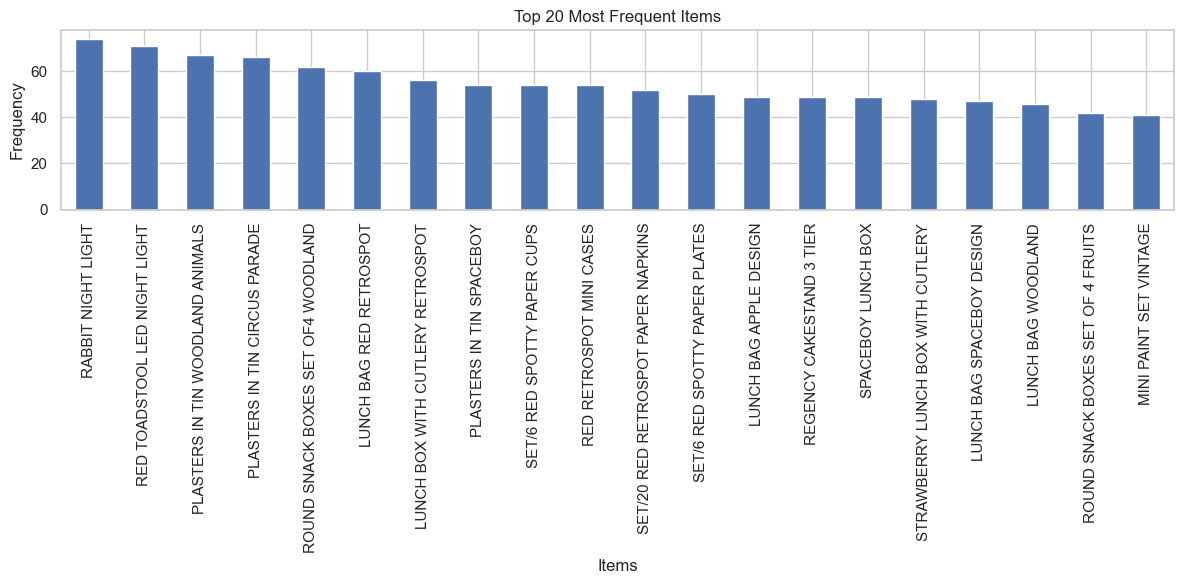

In [371]:
def plot_item_frequency(df):
    item_frequency = df.sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    item_frequency[:20].plot(kind='bar')
    plt.title('Top 20 Most Frequent Items')
    plt.xlabel('Items')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_item_frequency(basket_sets)

In [237]:
# call apriori function and pass minimum support here we are passing 7%. 
# means 7 times in total number of transaction the item should be present.
freq_items = apriori(basket_sets, min_support=0.07, use_colnames=True)
print(freq_items.shape)
freq_items.head(3)

(51, 2)


c:\Users\PC\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                       itemsets
0  0.071429  (4 TRADITIONAL SPINNING TOPS)
1  0.096939   (ALARM CLOCK BAKELIKE GREEN)
2  0.102041    (ALARM CLOCK BAKELIKE PINK)

In [ ]:
# freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
# print(freq_items.shape)
# freq_items.head(3)

In [238]:
# We would apply association rules on frequent itemset. 
# here we are setting based on lift and keeping minimum lift as 1
rules = association_rules(freq_items, metric="lift", min_threshold=1)
print(rules.shape)
rules.head(3)

(26, 10)


antecedents                   consequents  \
0  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
1   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
2  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.096939            0.102041  0.073980    0.763158  7.478947   
1            0.102041            0.096939  0.073980    0.725000  7.478947   
2            0.096939            0.094388  0.079082    0.815789  8.642959   

   leverage  conviction  zhangs_metric  
0  0.064088    3.791383       0.959283  
1  0.064088    3.283859       0.964734  
2  0.069932    4.916181       0.979224

In [ ]:
# rules['antecedent'] = rules['antecedents'].apply(lambda antecedents : list(antecedents)[0])
# rules['consequent'] = rules['consequents'].apply(lambda consequents : list(consequents)[0])
# rules['rule'] = rules.index
# rules

# cords = rules[['antecedent','consequent','rule']]
# parallel_coordinates(cords,'rule',colormap = 'ocean')

In [ ]:
# rules.sort_values('lift',ascending = False).head(5)

# rules.sort_values('confidence',ascending = False).head(5)

# rules.sort_values('support',ascending = False).head(5)

# rules[(rules['confidence']>0.79) & (rules['lift'] > 1.65)]

# print(len(rules[(rules['confidence']>0.79) & (rules['lift'] > 1.65)]))

# rules[(rules['leverage']< 0 ) & (rules['lift'] < 0.9)]

# data_four

In [290]:
df = pd.read_csv("data_4.csv")
print(df.shape)
df.head(3)

(38765, 3)


Member_number        Date itemDescription
0           1808  21-07-2015  tropical fruit
1           2552  05-01-2015      whole milk
2           2300  19-09-2015       pip fruit

# Visualization

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

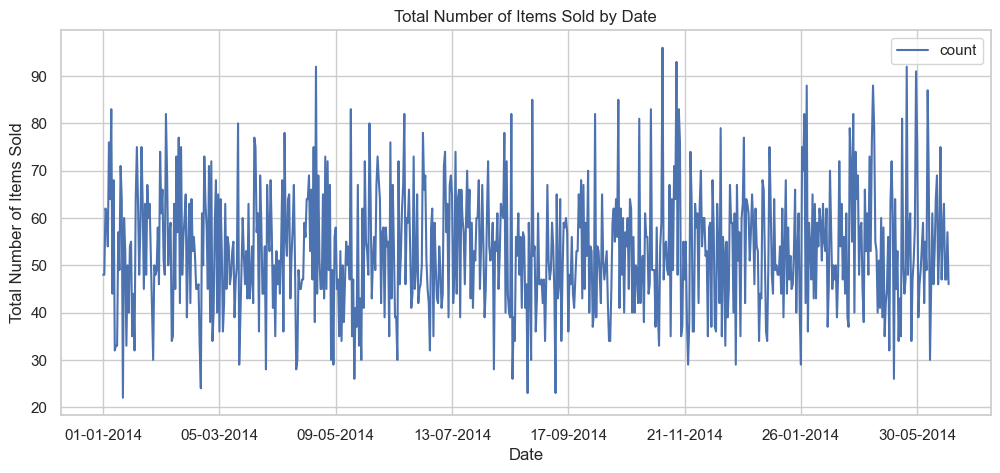

In [291]:
df.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [294]:
d=df.set_index(['Date'])
d.index=pd.to_datetime(d.index ,dayfirst=True)

total_items = len(d)

total_days = len(np.unique(d.index.date))

total_months = len(np.unique(d.index.month))

average_items = total_items / total_days

unique_items = d['itemDescription'].unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38765 items sold in 728 days throughout 12 months
With an average of 53.24862637362637 items sold daily


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

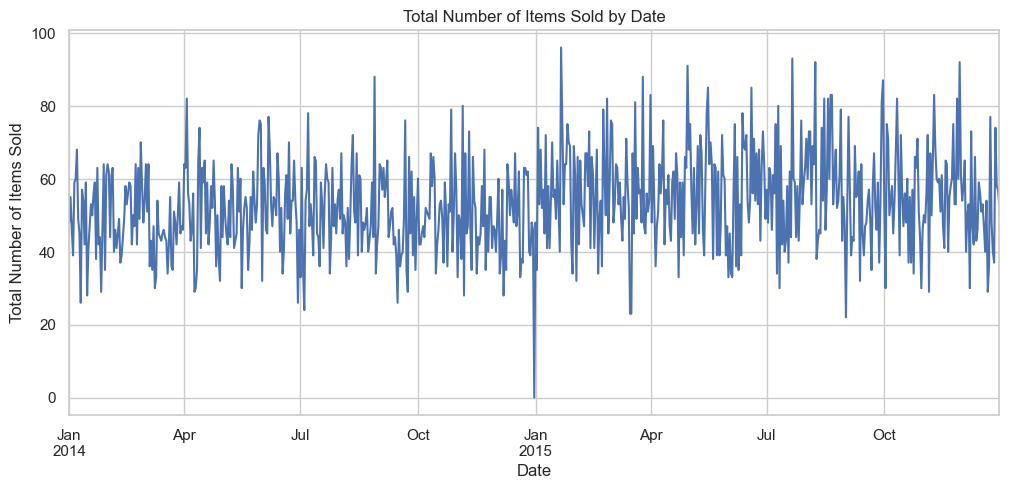

In [295]:
d.resample("D")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

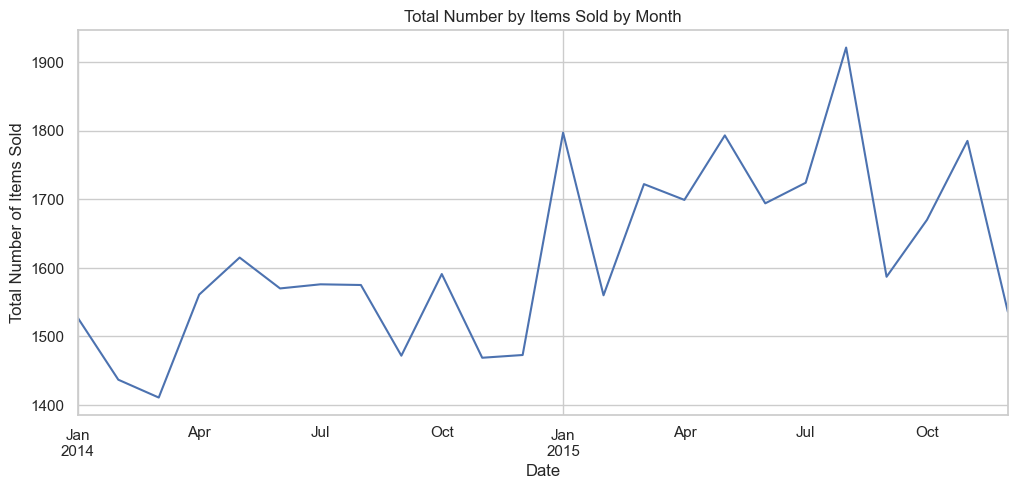

In [296]:
d.resample("ME")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [303]:
def bar_plot(df,col):

    fig = px.bar(df,
        x = df[col].value_counts().keys(), 
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
    xaxis_title= col,
    yaxis_title="Count",
    legend_title=col,
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
    
    fig.show()

bar_plot(df,'itemDescription')

# get transactions

In [349]:
data_group = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(lambda x: ','.join(x))
data_group

Member_number  Date      
1000           15-03-2015        sausage,whole milk,semi-finished bread,yogurt
               24-06-2014                        whole milk,pastry,salty snack
               24-07-2015                          canned beer,misc. beverages
               25-11-2015                             sausage,hygiene articles
               27-05-2015                              soda,pickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruit,berries,other vegetables,yogurt...
               26-12-2015                                  bottled water,herbs
5000           09-03-2014                         fruit/vegetable juice,onions
               10-02-2015             soda,root vegetables,semi-finished bread
               16-11-2014                        bottled beer,other vegetables
Name: itemDescription, Length: 14963, dtype: object

In [ ]:
# # If you want to come up with all the purchases that a person has purchased and This is an error in this example.
# new_df = df.groupby(['Member_number', 'itemDescription']).size().unstack().fillna(0)

In [350]:
df_group = pd.DataFrame(data_group).reset_index()
df_group.drop(['Member_number', 'Date'], axis=1, inplace=True)
df_group

itemDescription
0          sausage,whole milk,semi-finished bread,yogurt
1                          whole milk,pastry,salty snack
2                            canned beer,misc. beverages
3                               sausage,hygiene articles
4                                soda,pickled vegetables
...                                                  ...
14958  tropical fruit,berries,other vegetables,yogurt...
14959                                bottled water,herbs
14960                       fruit/vegetable juice,onions
14961           soda,root vegetables,semi-finished bread
14962                      bottled beer,other vegetables

[14963 rows x 1 columns]

In [351]:
transactions = df_group['itemDescription'].apply(lambda x : x.split(','))
print(transactions.shape)
transactions.head(3)

(14963,)


0    [sausage, whole milk, semi-finished bread, yog...
1                    [whole milk, pastry, salty snack]
2                       [canned beer, misc. beverages]
Name: itemDescription, dtype: object

In [352]:
transactions[0]

['sausage', 'whole milk', 'semi-finished bread', 'yogurt']

In [353]:
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
te_df = pd.DataFrame(te_ary, columns = te.columns_)
print(te_df.shape)
te_df.head(3)

(14963, 167)


Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False        True    True     False  
1       False        True   False     False  
2       False       False   False     False  

[3 rows x 167 columns]

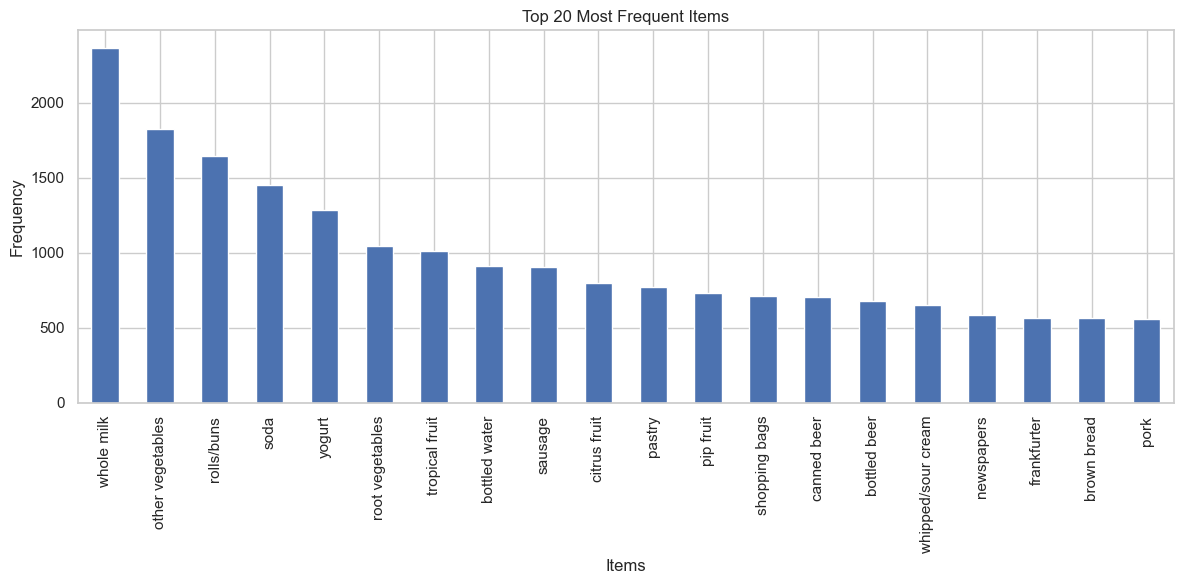

In [372]:
def plot_item_frequency(df):
    item_frequency = df.sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    item_frequency[:20].plot(kind='bar')
    plt.title('Top 20 Most Frequent Items')
    plt.xlabel('Items')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_item_frequency(te_df)

# Visualization

In [355]:
pf = te_df.describe()
pf

Instant food products UHT-milk abrasive cleaner artif. sweetener  \
count                  14963    14963            14963            14963   
unique                     2        2                2                2   
top                    False    False            False            False   
freq                   14903    14643            14941            14934   

       baby cosmetics   bags baking powder bathroom cleaner   beef berries  \
count           14963  14963         14963            14963  14963   14963   
unique              2      2             2                2      2       2   
top             False  False         False            False  False   False   
freq            14960  14959         14842            14946  14455   14637   

        ... turkey vinegar waffles whipped/sour cream whisky white bread  \
count   ...  14963   14963   14963              14963  14963       14963   
unique  ...      2       2       2                  2      2           2   
top     ...  False   False   False              False  False       False   
freq    ...  14883   14912   14686              14309  14955       14604   

       white wine whole milk yogurt zwieback  
count       14963      14963  14963    14963  
unique          2          2      2        2  
top         False      False  False    False  
freq        14788      12600  13678    14903  

[4 rows x 167 columns]

In [356]:
f = pf.iloc[0] - pf.iloc[3] # count - freq
f

Instant food products      60
UHT-milk                  320
abrasive cleaner           22
artif. sweetener           29
baby cosmetics              3
                         ... 
white bread               359
white wine                175
whole milk               2363
yogurt                   1285
zwieback                   60
Length: 167, dtype: object

In [357]:
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)

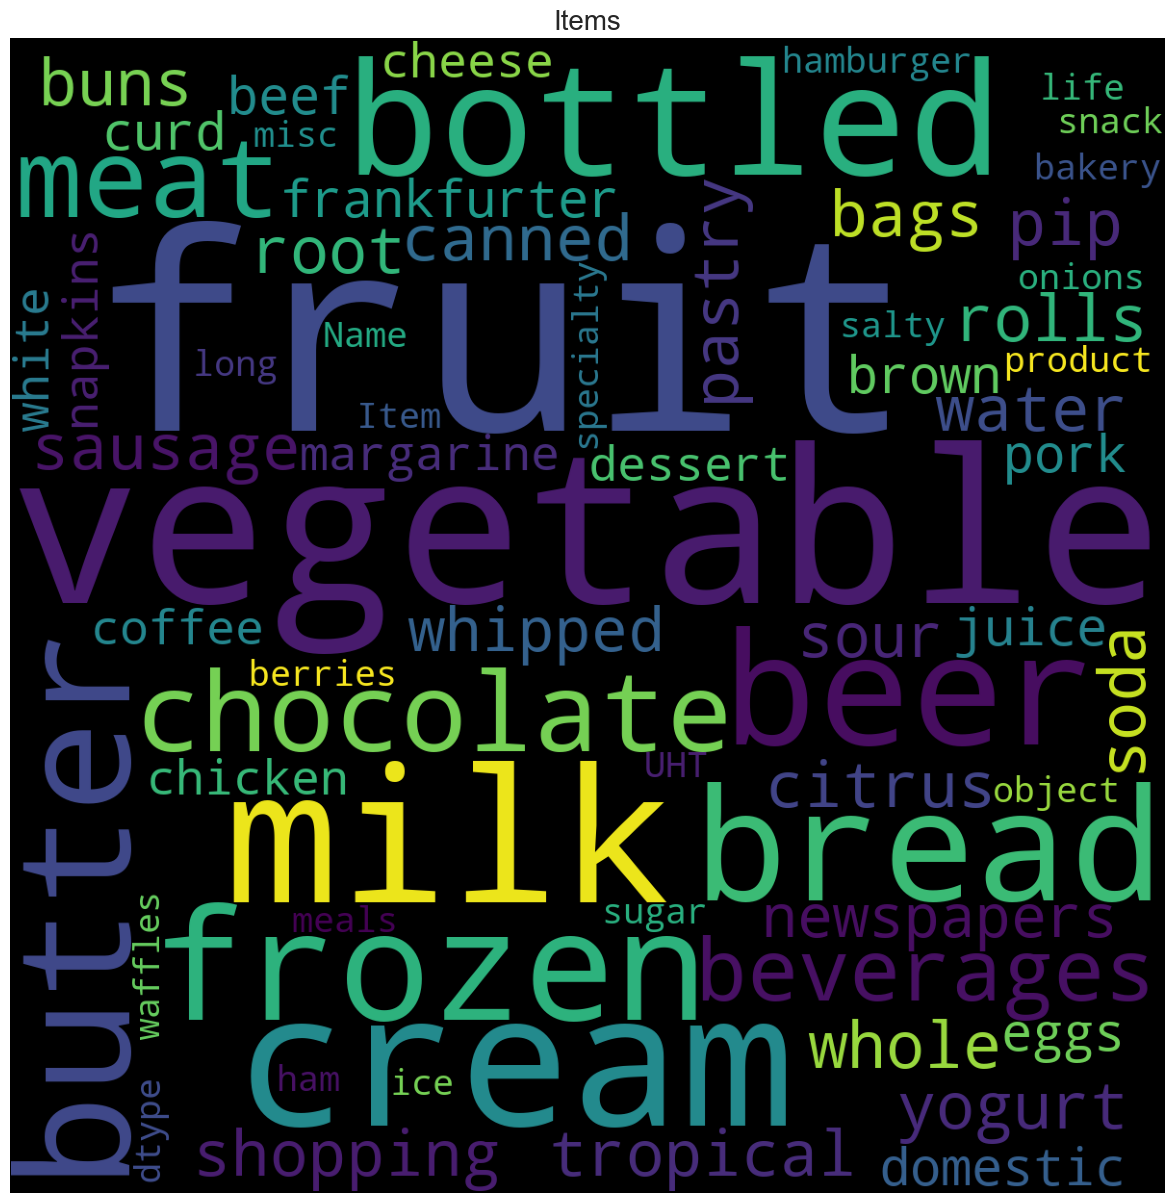

In [359]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 100).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [360]:
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

# association_rules with apriori

In [361]:
freq_items = apriori(te_df, min_support = 0.001, use_colnames = True, verbose = 1)
print(freq_items.shape)
freq_items.head(3)

Processing 28 combinations | Sampling itemset size 4e 3
(750, 2)


support                 itemsets
0  0.004010  (Instant food products)
1  0.021386               (UHT-milk)
2  0.001470       (abrasive cleaner)

In [ ]:
# freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
# print(freq_items.shape)
# freq_items.head(3)

In [362]:
rules =  association_rules(freq_items,metric = 'lift',min_threshold = 0.001)
print(rules.shape)
rules.head(3)

(1238, 10)


antecedents      consequents  antecedent support  \
0          (UHT-milk)  (bottled water)            0.021386   
1     (bottled water)       (UHT-milk)            0.060683   
2  (other vegetables)       (UHT-milk)            0.122101   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.060683  0.001069    0.050000  0.823954 -0.000228    0.988755   
1            0.021386  0.001069    0.017621  0.823954 -0.000228    0.996168   
2            0.021386  0.002139    0.017515  0.818993 -0.000473    0.996060   

   zhangs_metric  
0      -0.179204  
1      -0.185312  
2      -0.201119

In [378]:
def plot_rule_px_scatter(rules, x = 'support', y = 'confidence'):
    fig=px.scatter(rules[x], rules[y])
    fig.update_layout(
        xaxis_title="support",
        yaxis_title="confidence",
    
        font_family="Courier New",
        font_color="black",
        title_font_family="Times New Roman",
        title_font_color="red",
        title=(f'{x} vs {y}')
        
    )
    fig.show()

plot_rule_px_scatter(rules, x = 'support', y = 'confidence')

In [379]:
plot_rule_px_scatter(rules, x = 'support', y = 'lift')

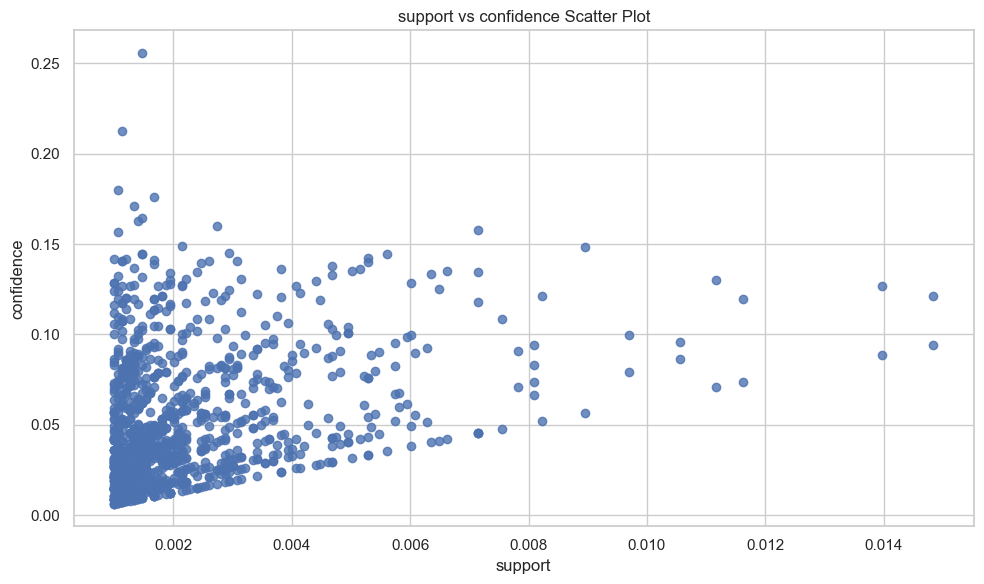

In [381]:
def plot_rule_scatter(rules, x = 'support', y = 'confidence'):
    plt.figure(figsize=(10, 6))
    plt.scatter(rules[x], rules[y], alpha=0.8)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y} Scatter Plot')
    plt.tight_layout()
    plt.show()

plot_rule_scatter(rules, x = 'support', y = 'confidence')

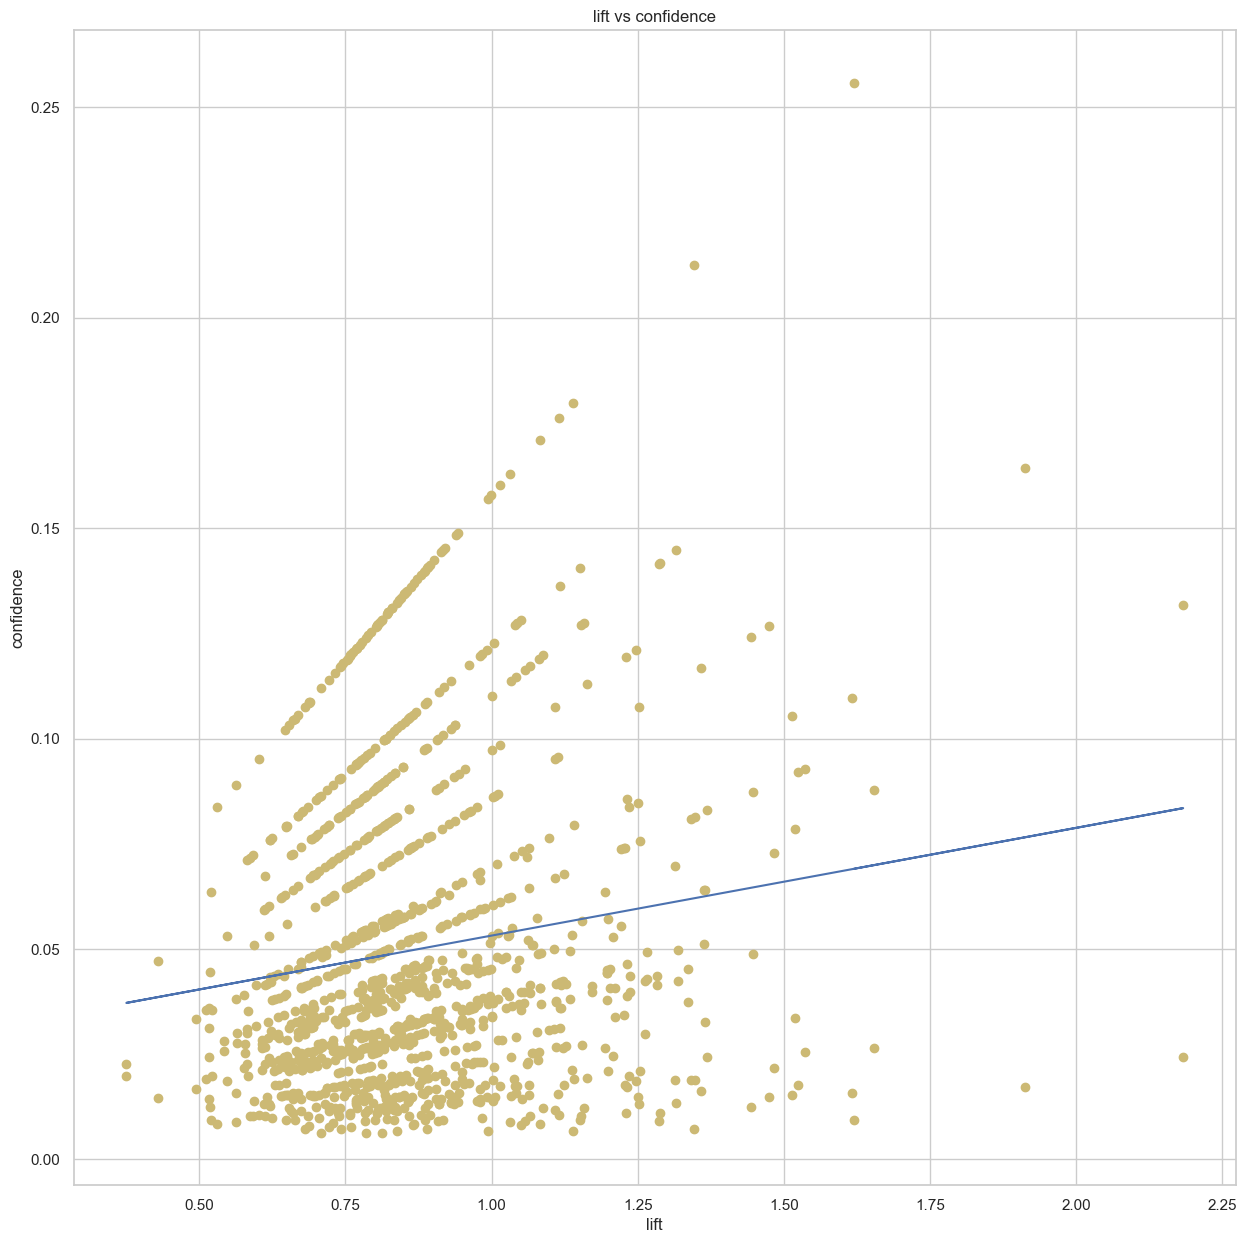

In [380]:
def plot_rule_polyfit(rules, x = 'lift', y = 'confidence'):
    fit = np.polyfit(rules[x], rules[y], 1)
    fit_fn = np.poly1d(fit)
    plt.plot(rules[x], rules[y], 'yo', rules[x], 
    fit_fn(rules[x]))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y}')

plot_rule_polyfit(rules, x = 'lift', y = 'confidence')